In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from collections import OrderedDict

In [2]:
data = pd.read_csv("../data/mlbam_pitch_20170427.csv").query("pit_box_name=='Tanaka'")

In [3]:
data[["inning_number", "pit_box_name", "bat_box_name", "bat_hand_cd", "px", "pz", "sz_top", "sz_bot", "pitch_type", "pitch_res", "start_speed", "pa_ball_ct", "pa_strike_ct", "pitch_des"]]

,inning_number,pit_box_name,bat_box_name,bat_hand_cd,px,pz,sz_top,sz_bot,pitch_type,pitch_res,start_speed,pa_ball_ct,pa_strike_ct,pitch_des
1165,1,Tanaka,Pedroia,R,0.983547,1.660159,3.616738,1.800820,FF,B,91.0,0,0,Ball
1166,1,Tanaka,Pedroia,R,1.149696,0.378749,3.659990,1.876568,FF,B,89.3,1,0,Ball
1167,1,Tanaka,Pedroia,R,0.869603,1.180127,3.659990,1.822463,FF,B,89.1,2,0,Ball
1168,1,Tanaka,Pedroia,R,0.100777,1.502873,3.690983,1.789016,FF,S,88.9,3,0,Called Strike
1169,1,Tanaka,Pedroia,R,0.000627,2.005813,3.659990,1.486971,FF,X,89.3,3,1,"In play, out(s)"
1170,1,Tanaka,Benintendi,L,-0.458179,0.959341,3.611112,1.817817,CU,B,74.4,0,0,Ball
1171,1,Tanaka,Benintendi,L,-0.474677,1.554469,3.675990,1.503971,SI,X,91.2,1,0,"In play, out(s)"
1172,1,Tanaka,Betts,R,0.792526,2.611092,3.605925,1.692602,CU,S,75.2,0,0,Called Strike
1173,1,Tanaka,Betts,R,0.743675,2.066101,3.659990,1.486971,FF,X,89.5,0,1,"In play, out(s)"
1189,2,Tanaka,"Ramirez, H",R,0.376398,2.224399,3.712245,1.935266,FF,S,88.9,0,0,Called Strike


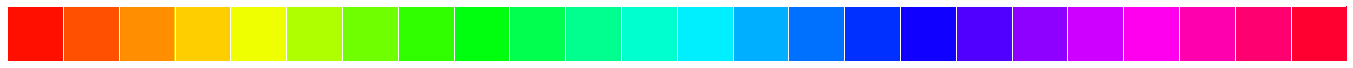

In [4]:
sns.palplot(sns.hls_palette(24, l = 0.5, s = 1))

In [5]:
PITCH_TYPES = {
    "CH": "Change-up",
    "CU": "Curve",
    "EP": "Ephuus",
    "FA": "Fastball",
    "FC": "Cut",
    "FF": "Four-seam",
    "FO": "Fork",
    "FS": "Split",
    "FT": "Two-seam",
    "KC": "Knuckle Curve",
    "KN": "Knuckle",
    "SC": "Screw",
    "SI": "Sinker",
    "SL": "Slider",
    "UN": "Unknown"
}

In [6]:
def get_marker(type):
    if type in ("FA", "FC", "FF", "FT"):
        return "o"
    elif type in ("CH", "FO", "FS", "KN", "SC"):
        return "v"
    elif type in ("CU", "KN", "SL"):
        return "<"
    elif type == "SI":
        return ">"
    return "H"

In [7]:
sns.set_context("notebook", 1.5, {"lines.linewidth": 2})

# 今のイニング、対戦打者、投球数を保持
situation = {
    "inning": 1,
    "batter": "Pedroia",
    "pitch": 1,
    "cnt": 1
}

{'pitch': 2, 'inning': 1, 'batter': 'Pedroia', 'cnt': 2}
2ball 0strike
0out


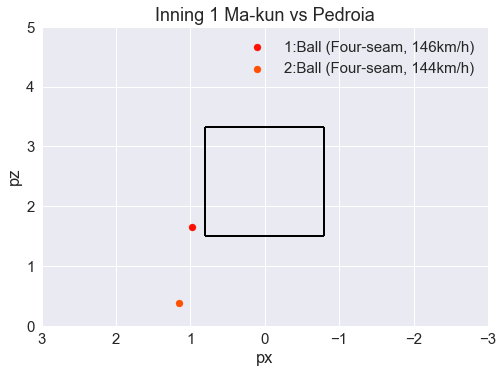

In [9]:
from IPython.display import display
button = widgets.Button(description="Throw!")
display(button)

def throw(situation):
    print(situation)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Inning {inning} Ma-kun vs {batter}".format(inning = situation["inning"], batter = situation["batter"]))
    ax.set_xlabel("px")
    ax.set_xlim((3.0, -3.0))
    ax.set_ylabel("pz")
    ax.set_ylim((0.0, 5.0))
    ax.grid(True)

    # ストライクゾーン
    ax.vlines(-0.8, ymin =1.5, ymax = 3.32)
    ax.vlines(0.8, ymin =1.5, ymax = 3.32)
    ax.hlines(1.5, xmin = -0.8, xmax = 0.8)
    ax.hlines(3.32, xmin = -0.8, xmax = 0.8)

    pitch_data = []
    for _, d in data.iterrows():
        if situation["inning"] == d["inning_number"] and situation["batter"] == d["bat_box_name"]:
            pitch_data.append(d)

    for i in range(0, situation["pitch"]):
        label = "{cnt}:{event} ({type}, {speed}km/h)".format(
            **{
                "cnt": i + 1,
                "event": pitch_data[i]["pitch_des"],
                "type": PITCH_TYPES.get(pitch_data[i]["pitch_type"]),
                "speed": round(pitch_data[i]["start_speed"] * 1.6093),
            }
        )
        color = sns.hls_palette(24, l = 0.5, s = 1)[i]
        marker = get_marker(pitch_data[i]["pitch_type"])

        ax.scatter(pitch_data[i]["px"], pitch_data[i]["pz"], label = label, c = color, marker = marker)

    if  len(pitch_data) > situation["pitch"]:
        pitch = situation["pitch"]
        print("{ball_ct}ball {st_ct}strike".format(ball_ct = pitch_data[pitch]["pa_ball_ct"], st_ct = pitch_data[pitch]["pa_strike_ct"]))
        print("{out_cn}out".format(out_cn = pitch_data[pitch]["event_outs_ct"] - 1))

    ax.legend()

    situation["pitch"] += 1
    situation["cnt"] +=1

    if len(pitch_data) < situation["pitch"]:
        situation["pitch"] = 1
        i = 1
        for _, d in data.iterrows():
            if i == situation["cnt"]:
                situation["inning"] = d["inning_number"]
                situation["batter"] = d["bat_box_name"]
                break
            i += 1

button.on_click(throw(situation))